Data upload and import packages

In [0]:
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/new_Life_Exp.csv
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/IHME_GBD_2015_OVERWEIGHT_PREVALENCE_1980_2015_Y2017M06D12.CSV
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/IHME_GBD_2015_OBESITY_PREVALENCE_1980_2015_Y2017M06D12.CSV 
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/new_gdp.csv 
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/res_population.csv
!wget https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_10515265.csv

--2019-04-15 16:24:40--  https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/new_Life_Exp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171307 (167K) [text/plain]
Saving to: ‘new_Life_Exp.csv’

new_Life_Exp.csv    100%[===================>] 167.29K  --.-KB/s    in 0.04s   

2019-04-15 16:24:40 (4.32 MB/s) - ‘new_Life_Exp.csv’ saved [171307/171307]

--2019-04-15 16:24:42--  https://raw.githubusercontent.com/semensorokin/NLP_projects/master/gregrsGraf/IHME_GBD_2015_OVERWEIGHT_PREVALENCE_1980_2015_Y2017M06D12.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP 

In [0]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data manipulations

### GDP
simple gdp

In [0]:
new_gdp = pd.read_csv('new_gdp.csv')
part_gdp = new_gdp[['Country Name', 
       '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
#part_gdp.iloc[:, 1:] = part_gdp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1)
#part_gdp = part_gdp.fillna(0)
print(part_gdp.head())
part_gdp.shape

  Country Name          1980          1981         1982         1983  \
0        Aruba           NaN           NaN          NaN          NaN   
1  Afghanistan    274.880859    266.493042          NaN          NaN   
2       Angola    664.117560    600.408766   579.252001   582.420126   
3      Albania           NaN           NaN          NaN          NaN   
4      Andorra  12377.411646  10372.232835  9610.266308  8022.654781   

          1984         1985          1986          1987          1988  \
0          NaN          NaN   6472.502029   7885.796545   9764.789979   
1          NaN          NaN           NaN           NaN           NaN   
2   596.602467   711.992700    647.563354    720.598938    761.618458   
3   639.484736   639.865909    693.873475    674.793383    652.774321   
4  7728.906695  7774.393829  10361.815982  12616.167566  14304.356965   

       ...               2006          2007          2008          2009  \
0      ...       24045.749421  25835.643142  27086.03

(264, 37)

GDP per capita
Data_gdp  = 1980-1990 - simple gdp, 1990-2015 - gdp per capita, concatination

In [0]:
n_gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_10515265.csv')
n_gdp = n_gdp[['Country Name', 
       '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
#n_gdp.iloc[:, 1:] = n_gdp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1)
#n_gdp = n_gdp.fillna(0)
for i in ['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989']:
  n_gdp[i]=part_gdp[i]
n_gdp.head()  


,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,6472.502029,7885.796545,9764.789979,...,36355.438329,37849.233481,38506.087251,34682.790124,33740.870887,35490.183984,35466.702231,37330.518246,38098.326593,38137.333578
1,Afghanistan,274.880859,266.493042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1052.924482,1196.963863,1236.874766,1474.479477,1659.507551,1649.150373,1832.734639,1902.508410,1927.087320,1918.938459
2,Angola,664.117560,600.408766,579.252001,582.420126,596.602467,711.992700,647.563354,720.598938,761.618458,...,5019.808921,5669.653527,6201.401882,6081.329190,6228.342912,6346.944372,6770.668417,6970.313604,7182.827798,7082.241175
3,Albania,NaN,NaN,NaN,NaN,639.484736,639.865909,693.873475,674.793383,652.774321,...,6559.777896,7276.307768,8228.318168,8814.847160,9627.937290,10207.718887,10526.280126,10571.003653,11259.279723,11661.981184
4,Andorra,12377.411646,10372.232835,9610.266308,8022.654781,7728.906695,7774.393829,10361.815982,12616.167566,14304.356965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all rows where there are any gaps  in data. 169 countries rest.

In [0]:
part_gdp = n_gdp
part_gdp = part_gdp.dropna()
print(part_gdp.shape)

(169, 37)


In [0]:
location_names = ['China', 'North Korea', 'Taiwan', 'Cambodia',
       'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar',
       'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste', 'Vietnam',
       'Oceania', 'Fiji', 'Kiribati', 'Marshall Islands',
       'Federated States of Micronesia', 'Papua New Guinea', 'Samoa',
       'Solomon Islands', 'Tonga', 'Vanuatu',
       'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Kyrgyzstan',
       'Mongolia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan',
       'Albania', 'Bosnia and Herzegovina', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Hungary', 'Macedonia', 'Montenegro',
       'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia',
       'Belarus', 'Estonia', 'Latvia', 'Lithuania',
       'Moldova', 'Russia', 'Ukraine', 
       'Brunei', 'Japan', 'South Korea',
       'Singapore', 'Australasia', 'Australia', 'New Zealand',
       'Andorra', 'Austria', 'Belgium', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'Argentina', 'Chile',
       'Uruguay', 'Canada', 'United States',
       'Latin America and Caribbean', 'Caribbean', 'Antigua and Barbuda',
       'The Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica',
       'Dominican Republic', 'Grenada', 'Guyana', 'Haiti', 'Jamaica',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Andean Latin America', 'Bolivia',
       'Ecuador', 'Peru', 'Colombia',
       'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Venezuela',
       'Brazil', 'Paraguay', 'Algeria',
       'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon',
       'Libya', 'Morocco', 'Palestine', 'Oman', 'Qatar', 'Saudi Arabia',
       'Syria', 'Tunisia', 'Turkey', 'United Arab Emirates', 'Yemen',
       'South Asia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
       'Nepal', 'Pakistan', 'Angola', 'Central African Republic',
       'Congo', 'Democratic Republic of the Congo', 'Equatorial Guinea',
       'Gabon', 'Burundi', 'Comoros',
       'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi',
       'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia',
       'Tanzania', 'Uganda', 'Zambia',
       'Botswana', 'Lesotho', 'Namibia', 'Swaziland',
       'Zimbabwe', 'Benin', 'Burkina Faso',
       'Cameroon', 'Cape Verde', 'Chad', "Cote d'Ivoire", 'The Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali',
       'Mauritania', 'Niger', 'Nigeria', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Togo', 'American Samoa', 'Bermuda',
       'Greenland', 'Guam', 'Northern Mariana Islands', 'Puerto Rico',
       'Virgin Islands, U.S.', 'South Sudan', 'Sudan']
print(len(location_names))

200


get only contries (in data there are some regions or continents)

In [0]:
part_gdp_cs =[]
rest_loc_names = []
for i in location_names:
  k = part_gdp[part_gdp['Country Name']==i].values
  if len(k)!=0:
    part_gdp_cs.append(k[0])
    rest_loc_names.append(k[0][0])
part_gdp_cs = pd.DataFrame(part_gdp_cs, columns = part_gdp.columns)
print(part_gdp_cs.shape, len(rest_loc_names))
part_gdp_cs.head()

(118, 37) 118


,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,194.804722,197.071474,203.334920,225.431929,250.713969,294.458849,281.928121,251.811957,283.537695,...,5883.719377,6863.981755,7635.072611,8374.432271,9333.124237,10384.366599,11351.062058,12367.965009,13440.477463,14450.094990
1,Indonesia,491.437779,566.425291,583.526172,512.845204,525.229140,516.867806,474.780945,442.148119,481.712761,...,6517.949093,7019.748930,7486.019470,7787.123624,8262.899269,8837.820122,9421.586953,9979.517292,10537.660015,11040.197213
2,Malaysia,1774.736310,1769.126939,1852.330981,2047.882636,2234.356477,2000.145978,1728.543559,1947.442371,2071.454880,...,17667.868315,18931.315673,19873.170893,19367.890997,20680.296848,21818.875694,23006.925534,24033.971259,25487.609435,26639.427225
3,Philippines,684.654382,731.725008,741.787134,645.460293,594.025576,565.763467,535.235835,579.201111,643.815251,...,4535.140920,4881.396533,5100.535756,5115.481777,5483.620944,5707.204842,6099.121248,6526.650182,6937.850118,7320.498539
4,Sri Lanka,267.668292,289.120088,307.612347,328.605479,378.867467,369.501629,390.259145,401.380898,413.357035,...,6351.957450,6914.786273,7419.359138,7690.427034,8357.030642,9193.359884,10163.859863,10595.716483,11219.553479,11798.390113


Get intervals by using defferent quantilies, so separte countries into groups by the values of gdp in 2013 

In [0]:
import numpy 
ints = part_gdp_cs['2013'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()
res_ints = []
for index, j in enumerate(ints[:-1]):
  res_ints.append((j, ints[index+1]))
print(res_ints)

[(613.734675996452, 2870.809223135546), (2870.809223135546, 7303.72728269573), (7303.72728269573, 16091.012477576063), (16091.012477576063, 36184.20066139898), (36184.20066139898, 95590.5386984251)]


In [0]:
ints =[(613.734675996452, 2870.809223135546), (2870.809223135546, 7303.72728269573), (7303.72728269573, 16091.012477576063), (16091.012477576063, 36184.20066139898), (36184.20066139898, 95590.5386984251)]

In [0]:
new_colm = []
for i in part_gdp_cs['2013'].tolist():
  for index, (minn, maxx) in enumerate(ints):
    if (i> minn and i<=maxx) or (i>=minn and i<maxx) :
      new_colm.append(index)
      
print(len(part_gdp_cs['2013'].tolist()), len(new_colm))
part_gdp_cs['labels'] = new_colm
part_gdp_cs.head()

118 118


,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,labels
0,China,194.804722,197.071474,203.334920,225.431929,250.713969,294.458849,281.928121,251.811957,283.537695,...,6863.981755,7635.072611,8374.432271,9333.124237,10384.366599,11351.062058,12367.965009,13440.477463,14450.094990,2
1,Indonesia,491.437779,566.425291,583.526172,512.845204,525.229140,516.867806,474.780945,442.148119,481.712761,...,7019.748930,7486.019470,7787.123624,8262.899269,8837.820122,9421.586953,9979.517292,10537.660015,11040.197213,2
2,Malaysia,1774.736310,1769.126939,1852.330981,2047.882636,2234.356477,2000.145978,1728.543559,1947.442371,2071.454880,...,18931.315673,19873.170893,19367.890997,20680.296848,21818.875694,23006.925534,24033.971259,25487.609435,26639.427225,3
3,Philippines,684.654382,731.725008,741.787134,645.460293,594.025576,565.763467,535.235835,579.201111,643.815251,...,4881.396533,5100.535756,5115.481777,5483.620944,5707.204842,6099.121248,6526.650182,6937.850118,7320.498539,1
4,Sri Lanka,267.668292,289.120088,307.612347,328.605479,378.867467,369.501629,390.259145,401.380898,413.357035,...,6914.786273,7419.359138,7690.427034,8357.030642,9193.359884,10163.859863,10595.716483,11219.553479,11798.390113,2


create groups by group labels using mean 

In [0]:
gdp_res = part_gdp_cs.iloc[:, 1:].groupby('labels').mean()
gdp_res.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
labels,,,,,,,,,,,,,,,,,,,,,
0,386.108738,374.407851,362.256260,334.384479,328.557228,318.352901,355.408768,378.276135,408.637675,398.062642,...,1376.778498,1439.511680,1484.419346,1504.479176,1565.761760,1643.375904,1723.934117,1774.347998,1841.344882,1873.933022
1,686.618403,739.358159,697.686016,654.676375,651.421092,638.271174,641.036125,689.109275,710.173738,677.182234,...,3627.499375,3868.166482,4049.595403,4115.767576,4294.868405,4505.509335,4747.807556,4961.561920,5203.032786,5385.271456
2,1436.028554,1420.952172,1415.128681,1383.489484,1380.583589,1301.402803,1391.956735,1508.815560,1575.863524,1597.559811,...,8621.971040,9244.846980,9728.097227,9723.238809,10238.003346,10748.950095,11244.774363,11748.719243,12237.773571,12516.261955
3,3607.993330,3622.209501,3560.777912,3427.239098,3417.200992,3454.372003,3954.634082,4575.880150,5085.037043,5269.026777,...,20726.802453,22232.100519,23179.851359,22669.970172,23104.778243,23984.002852,24554.896012,25204.491103,25887.225934,26435.831591
4,13128.355143,12807.527840,12179.745970,11679.598495,11519.678339,11612.284749,13805.120379,16361.067145,17991.404915,18439.685309,...,42681.922360,44579.029597,45711.981572,44015.168961,45382.521466,47437.680981,48642.901635,50570.329068,52011.245668,53518.992144


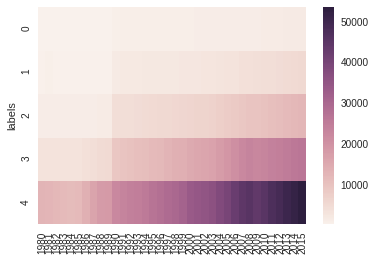

In [0]:
Index= gdp_res.index
Cols = gdp_res.columns
df = gdp_res

sns.heatmap(df, )

Print countries by their group membership

In [0]:
grs = part_gdp_cs[['Country Name', 'labels']].groupby('labels')

res_country = []
for i in range(len(ints)):
  res_country.append(grs.get_group(i)['Country Name'].tolist())
  
res_country

[['Kiribati',
  'Solomon Islands',
  'Haiti',
  'Nepal',
  'Central African Republic',
  'Burundi',
  'Comoros',
  'Kenya',
  'Madagascar',
  'Malawi',
  'Mozambique',
  'Rwanda',
  'Uganda',
  'Lesotho',
  'Zimbabwe',
  'Benin',
  'Burkina Faso',
  'Chad',
  'Guinea-Bissau',
  'Mali',
  'Niger',
  'Senegal',
  'Sierra Leone',
  'Togo'],
 ['Philippines',
  'Papua New Guinea',
  'Tonga',
  'Vanuatu',
  'Guyana',
  'Bolivia',
  'El Salvador',
  'Guatemala',
  'Honduras',
  'Nicaragua',
  'Morocco',
  'South Asia',
  'Bangladesh',
  'India',
  'Pakistan',
  'Angola',
  'Zambia',
  'Cameroon',
  "Cote d'Ivoire",
  'Ghana',
  'Mauritania',
  'Nigeria',
  'Sudan'],
 ['China',
  'Indonesia',
  'Sri Lanka',
  'Thailand',
  'Fiji',
  'Belize',
  'Dominica',
  'Dominican Republic',
  'Grenada',
  'Jamaica',
  'Suriname',
  'Ecuador',
  'Peru',
  'Colombia',
  'Costa Rica',
  'Brazil',
  'Paraguay',
  'Algeria',
  'Iraq',
  'Jordan',
  'Tunisia',
  'Bhutan',
  'Botswana',
  'Namibia'],
 ['Malaysi

In [0]:
countries_labls = list(zip(part_gdp_cs['Country Name'].tolist(), part_gdp_cs['labels'].tolist()))
countries_labls[:3]

[('China', 2), ('Indonesia', 2), ('Malaysia', 3)]

Life Expectancy

In [0]:
lifeExp = pd.read_csv('new_Life_Exp.csv', encoding = 'windows-1252', sep=';')
part_lifeExp = lifeExp[['Country Name',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
part_lifeExp.iloc[:,1:] = part_lifeExp.iloc[:,1:].apply(lambda row: row.fillna(row.mean()), axis=1)
part_lifeExp = part_lifeExp.fillna(0)

part_lifeExp_cs =[]

for i, label in countries_labls:
  k = part_lifeExp[part_lifeExp['Country Name']==i].values
  if len(k)!=0:
    part_lifeExp_cs.append(k[0])
part_lifeExp_cs = pd.DataFrame(part_lifeExp_cs, columns = part_lifeExp.columns)
part_lifeExp_cs.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,66.377,66.843,67.256,67.618,67.933,68.210,68.451,68.661,68.842,...,73.987,74.291,74.562,74.808,75.032,75.236,75.425,75.602,75.769,75.932
1,Indonesia,59.171,59.618,60.045,60.451,60.836,61.203,61.555,61.899,62.241,...,67.191,67.386,67.581,67.775,67.964,68.150,68.331,68.509,68.684,68.856
2,Malaysia,67.732,68.044,68.348,68.643,68.930,69.210,69.482,69.746,70.002,...,73.463,73.577,73.704,73.852,74.022,74.210,74.408,74.606,74.797,74.976
3,Philippines,61.946,62.155,62.421,62.732,63.073,63.434,63.798,64.149,64.475,...,67.783,67.892,68.000,68.105,68.211,68.320,68.433,68.553,68.680,68.813
4,Sri Lanka,67.751,68.171,68.529,68.801,68.975,69.058,69.079,69.086,69.121,...,73.896,74.059,74.144,74.207,74.270,74.352,74.462,74.593,74.741,74.906


heat map on the groupped data by gdp, value of group is a median life exp

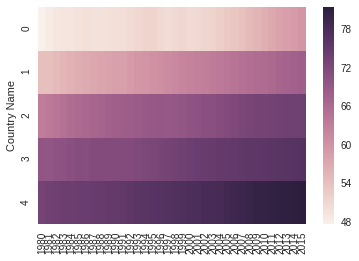

In [0]:
def lab(x):
  for i, j in countries_labls:
    if i==x:
      return j
    
life_exp_for_HM = part_lifeExp_cs
life_exp_for_HM_copy = life_exp_for_HM.copy()
life_exp_for_HM_copy['labels'] = life_exp_for_HM_copy['Country Name'].apply(lab)

life_exp_for_HM['Country Name'] = life_exp_for_HM['Country Name'].apply(lab)

gr_life_exp_for_HM = life_exp_for_HM.groupby('Country Name').median()

sns.heatmap(gr_life_exp_for_HM, )

Population Data

In [0]:
res_population = pd.read_csv('res_population.csv')
res_population = res_population[['Country Name',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']]
part_res_pop =[]

for i, label in countries_labls:
  k = res_population[res_population['Country Name']==i].values
  if len(k)!=0:
    part_res_pop.append(k[0])
part_res_pop = pd.DataFrame(part_res_pop, columns = res_population.columns)
part_res_pop.head()

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,981235000.0,993885000.0,1.008630e+09,1.023310e+09,1.036825e+09,1.051040e+09,1.066790e+09,1.084035e+09,1.101630e+09,...,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09
1,Indonesia,147490365.0,150978840.0,1.545063e+08,1.580443e+08,1.615556e+08,1.650122e+08,1.684020e+08,1.717289e+08,1.750009e+08,...,2.298382e+08,2.329891e+08,2.361593e+08,2.393405e+08,2.425241e+08,2.457075e+08,2.488832e+08,2.520323e+08,2.551311e+08,2.581621e+08
2,Malaysia,13798125.0,14133840.0,1.447063e+07,1.481862e+07,1.519162e+07,1.559894e+07,1.604505e+07,1.652511e+07,1.702759e+07,...,2.614357e+07,2.662584e+07,2.711107e+07,2.760538e+07,2.811229e+07,2.863513e+07,2.917046e+07,2.970672e+07,3.022802e+07,3.072316e+07
3,Philippines,47396968.0,48715592.0,5.006849e+07,5.145503e+07,5.287397e+07,5.432365e+07,5.580407e+07,5.731331e+07,5.884520e+07,...,8.780942e+07,8.929349e+07,9.075186e+07,9.222088e+07,9.372662e+07,9.527794e+07,9.686664e+07,9.848103e+07,1.001022e+08,1.017164e+08
4,Sri Lanka,15035856.0,15273391.0,1.550252e+07,1.572680e+07,1.595142e+07,1.617980e+07,1.641271e+07,1.664794e+07,1.688219e+07,...,1.967015e+07,1.981079e+07,1.994583e+07,2.007509e+07,2.019835e+07,2.031502e+07,2.042500e+07,2.058500e+07,2.077100e+07,2.096600e+07


In [0]:
part_res_pop_copy = part_res_pop.copy()
part_res_pop_copy['labels'] = part_res_pop_copy['Country Name'].apply(lab)
part_res_pop['Country Name'] = part_res_pop['Country Name'].apply(lab)
part_res_pop = part_res_pop.dropna()
print(part_res_pop.head())
res_pop_group = part_res_pop.groupby('Country Name').sum()
res_pop_group = res_pop_group.reset_index()
print(res_pop_group.shape)
res_pop_group.head()

   Country Name         1980         1981          1982          1983  \
0             2  981235000.0  993885000.0  1.008630e+09  1.023310e+09   
1             2  147490365.0  150978840.0  1.545063e+08  1.580443e+08   
2             3   13798125.0   14133840.0  1.447063e+07  1.481862e+07   
3             1   47396968.0   48715592.0  5.006849e+07  5.145503e+07   
4             2   15035856.0   15273391.0  1.550252e+07  1.572680e+07   

           1984          1985          1986          1987          1988  \
0  1.036825e+09  1.051040e+09  1.066790e+09  1.084035e+09  1.101630e+09   
1  1.615556e+08  1.650122e+08  1.684020e+08  1.717289e+08  1.750009e+08   
2  1.519162e+07  1.559894e+07  1.604505e+07  1.652511e+07  1.702759e+07   
3  5.287397e+07  5.432365e+07  5.580407e+07  5.731331e+07  5.884520e+07   
4  1.595142e+07  1.617980e+07  1.641271e+07  1.664794e+07  1.688219e+07   

       ...               2006          2007          2008          2009  \
0      ...       1.311020e+09  1.31

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,1.373578e+08,1.412444e+08,1.452743e+08,1.494483e+08,1.537667e+08,1.582252e+08,1.628404e+08,1.676010e+08,1.724409e+08,...,2.776682e+08,2.852756e+08,2.930912e+08,3.011195e+08,3.093636e+08,3.178257e+08,3.265058e+08,3.354025e+08,3.445128e+08,3.538334e+08
1,1,1.984526e+09,2.033914e+09,2.084481e+09,2.136081e+09,2.188530e+09,2.241678e+09,2.295439e+09,2.349779e+09,2.404659e+09,...,3.438127e+09,3.494562e+09,3.550607e+09,3.606428e+09,3.662151e+09,3.717795e+09,3.773319e+09,3.828768e+09,3.884090e+09,3.939244e+09
2,2,1.424385e+09,1.447541e+09,1.472925e+09,1.498313e+09,1.522527e+09,1.547368e+09,1.573647e+09,1.601322e+09,1.629240e+09,...,2.007456e+09,2.023076e+09,2.038642e+09,2.054147e+09,2.069631e+09,2.085259e+09,2.101150e+09,2.117229e+09,2.133402e+09,2.149392e+09
3,3,3.051076e+08,3.094877e+08,3.137721e+08,3.179892e+08,3.221520e+08,3.262971e+08,3.303832e+08,3.344777e+08,3.385877e+08,...,4.168198e+08,4.218703e+08,4.270154e+08,4.318596e+08,4.364434e+08,4.408992e+08,4.452830e+08,4.500217e+08,4.546181e+08,4.586643e+08
4,4,6.552414e+08,6.604283e+08,6.653194e+08,6.698922e+08,6.743325e+08,6.789402e+08,6.839326e+08,6.889784e+08,6.942431e+08,...,8.004360e+08,8.070124e+08,8.139671e+08,8.204653e+08,8.266852e+08,8.308539e+08,8.366782e+08,8.423504e+08,8.482629e+08,8.545808e+08


In [0]:
kk = part_res_pop.iloc[: , 1:] * part_lifeExp_cs.iloc[: , 1:]
kk['Country Name'] = res_pop_group['Country Name']
kk.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country Name
0,6.513144e+10,6.643426e+10,6.783642e+10,6.919418e+10,7.043463e+10,7.169144e+10,7.302284e+10,7.443093e+10,7.583841e+10,7.718909e+10,...,9.790699e+10,9.876893e+10,9.958890e+10,1.003707e+11,1.011270e+11,1.018762e+11,1.026206e+11,1.033694e+11,1.041195e+11,0.0
1,8.727152e+09,9.001056e+09,9.277329e+09,9.553939e+09,9.828395e+09,1.009924e+10,1.036599e+10,1.062985e+10,1.089223e+10,1.115437e+10,...,1.570021e+10,1.595988e+10,1.622130e+10,1.648291e+10,1.674497e+10,1.700644e+10,1.726648e+10,1.752343e+10,1.777601e+10,1.0
2,9.345746e+08,9.617230e+08,9.890388e+08,1.017194e+09,1.047159e+09,1.079603e+09,1.114842e+09,1.152560e+09,1.191965e+09,1.231919e+09,...,1.959050e+09,1.998194e+09,2.038713e+09,2.080928e+09,2.125013e+09,2.170515e+09,2.216300e+09,2.260965e+09,2.303499e+09,2.0
3,2.936053e+09,3.027918e+09,3.125325e+09,3.227877e+09,3.334920e+09,3.445966e+09,3.560188e+09,3.676592e+09,3.794045e+09,3.911581e+09,...,6.062314e+09,6.171127e+09,6.280703e+09,6.393187e+09,6.509389e+09,6.628875e+09,6.751170e+09,6.875022e+09,6.999408e+09,3.0
4,1.018694e+09,1.041202e+09,1.062372e+09,1.082020e+09,1.100249e+09,1.117344e+09,1.133774e+09,1.150140e+09,1.166914e+09,1.184215e+09,...,1.467167e+09,1.478864e+09,1.489712e+09,1.500132e+09,1.510462e+09,1.520886e+09,1.535497e+09,1.552445e+09,1.570479e+09,4.0


In [0]:
part_lifeExp_cs = kk
part_lifeExp_cs['labels'] = [i for j,i in countries_labls]

res_lifeExp_pop = part_lifeExp_cs[['1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'labels']].groupby('labels').sum()
print(res_lifeExp_pop.shape)
res_lifeExp_pop.head(10)


(5, 36)


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
labels,,,,,,,,,,,,,,,,,,,,,
0,6.557824e+09,6.810315e+09,7.070151e+09,7.335963e+09,7.606003e+09,7.877990e+09,8.148684e+09,8.412789e+09,8.664911e+09,8.901836e+09,...,1.517369e+10,1.582643e+10,1.651160e+10,1.722197e+10,1.795114e+10,1.869177e+10,1.943777e+10,2.018736e+10,2.093925e+10,2.169106e+10
1,1.059957e+11,1.096011e+11,1.132296e+11,1.168870e+11,1.205841e+11,1.243282e+11,1.281344e+11,1.320277e+11,1.360177e+11,1.401187e+11,...,2.199038e+11,2.248915e+11,2.299139e+11,2.349663e+11,2.400440e+11,2.451184e+11,2.501612e+11,2.551548e+11,2.600835e+11,2.649327e+11
2,9.231147e+10,9.445188e+10,9.671129e+10,9.894208e+10,1.010658e+11,1.032105e+11,1.054294e+11,1.077212e+11,1.100044e+11,1.122208e+11,...,1.460356e+11,1.477467e+11,1.494157e+11,1.510519e+11,1.526607e+11,1.542557e+11,1.558509e+11,1.574439e+11,1.590300e+11,1.605966e+11
3,2.095029e+10,2.134719e+10,2.175946e+10,2.218056e+10,2.252825e+10,2.295369e+10,2.331825e+10,2.371278e+10,2.411213e+10,2.447713e+10,...,3.175964e+10,3.226946e+10,3.272819e+10,3.317944e+10,3.361779e+10,3.405067e+10,3.451328e+10,3.493472e+10,3.542099e+10,3.582337e+10
4,4.843544e+10,4.882203e+10,4.940866e+10,4.996071e+10,5.039311e+10,5.090441e+10,5.135140e+10,5.187524e+10,5.244863e+10,5.294388e+10,...,6.317472e+10,6.389984e+10,6.466020e+10,6.525408e+10,6.597658e+10,6.642193e+10,6.703338e+10,6.758855e+10,6.813978e+10,6.885358e+10


In [0]:
lifeExp_pop = res_lifeExp_pop.values/res_pop_group.iloc[:,1:]
lifeExp_pop.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,47.742651,48.216546,48.667602,49.086979,49.464558,49.789743,50.040925,50.195350,50.248569,50.215605,...,54.646843,55.477673,56.336032,57.193133,58.026026,58.811390,59.532684,60.188467,60.779318,61.303032
1,53.411101,53.886821,54.320277,54.720313,55.098212,55.462114,55.821320,56.187269,56.564258,56.957503,...,63.960341,64.354687,64.753425,65.152069,65.547268,65.931135,66.297394,66.641505,66.961231,67.254705
2,64.807939,65.249862,65.659363,66.035642,66.380294,66.700646,66.996888,67.270183,67.518838,67.746775,...,72.746613,73.030708,73.291780,73.535107,73.762273,73.974327,74.174077,74.363170,74.542919,74.717245
3,68.665267,68.975892,69.347955,69.752579,69.930497,70.345972,70.579421,70.894936,71.213843,71.440739,...,76.195141,76.491420,76.644053,76.829223,77.026694,77.230071,77.508654,77.628986,77.913718,78.103687
4,73.920000,73.924803,74.263070,74.580216,74.730349,74.976279,75.082551,75.292988,75.547924,75.621764,...,78.925382,79.180748,79.438346,79.533007,79.808585,79.944169,80.118474,80.238040,80.328603,80.570002


In [0]:
res_lifeExp_pop = lifeExp_pop

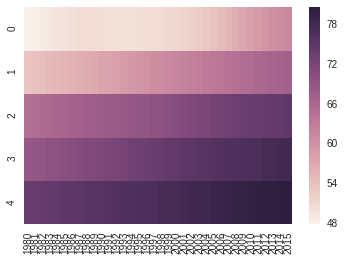

In [0]:
sns.heatmap(res_lifeExp_pop, )

Obesity

In [0]:
obesity = pd.read_csv('IHME_GBD_2015_OBESITY_PREVALENCE_1980_2015_Y2017M06D12.CSV')
part_obes = obesity[(obesity['sex']=='Both') & (obesity['age_group_name']=='adults (20+) age-standardized`') &  (obesity['metric'] == 'Percent')]
cs = [i for i, j in countries_labls]

part_obes = part_obes[part_obes['location_name'].isin(cs)]
 
pa_obes = part_obes[['location_name', 'year_id', 'mean']]
print(pa_obes.head())

       location_name  year_id      mean
989932         China     1980  0.006117
989938         China     1981  0.006708
989944         China     1982  0.007390
989950         China     1983  0.008124
989956         China     1984  0.008901


In [0]:
g = pa_obes.pivot_table(index = 'location_name', columns = 'year_id', values = 'mean')
part_obes = g.reset_index()
part_obes = part_obes.sort_values('location_name')
print(part_obes.head())

year_id        location_name      1980      1981      1982      1983  \
0                    Algeria  0.067573  0.074045  0.080641  0.087173   
1                     Angola  0.021269  0.020625  0.019874  0.019062   
2        Antigua and Barbuda  0.096480  0.096811  0.097055  0.100629   
3                  Argentina  0.195970  0.195609  0.194739  0.193501   
4                  Australia  0.172276  0.168658  0.165143  0.161826   

year_id      1984      1985      1986      1987      1988    ...         2006  \
0        0.093517  0.099552  0.105095  0.109941  0.114230    ...     0.176125   
1        0.018242  0.017440  0.016665  0.016218  0.016064    ...     0.062449   
2        0.104297  0.108055  0.111666  0.115367  0.119157    ...     0.185315   
3        0.192089  0.190431  0.188770  0.187347  0.186116    ...     0.206483   
4        0.158825  0.156188  0.153879  0.151974  0.150380    ...     0.249186   

year_id      2007      2008      2009      2010      2011      2012      2013  \

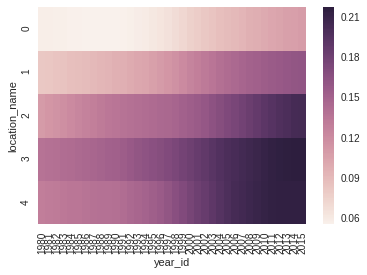

In [0]:
obes_for_HM_ = part_obes.copy()
obes_for_HM_copy = obes_for_HM_.copy()
obes_for_HM_copy['labels'] = obes_for_HM_copy['location_name'].apply(lab)
obes_for_HM_['location_name'] = obes_for_HM_['location_name'].apply(lab)
gr_obes_for_HM_mean = obes_for_HM_.groupby('location_name').mean()
sns.heatmap(gr_obes_for_HM_mean, )

In [0]:
life_exp_for_HM_copy

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,labels
0,China,66.377000,66.843000,67.256000,67.618000,67.933000,68.210000,68.451000,68.661000,68.842000,...,74.291000,74.562000,74.808000,75.032000,75.236000,75.425000,75.602000,75.769000,75.932000,2
1,Indonesia,59.171000,59.618000,60.045000,60.451000,60.836000,61.203000,61.555000,61.899000,62.241000,...,67.386000,67.581000,67.775000,67.964000,68.150000,68.331000,68.509000,68.684000,68.856000,2
2,Malaysia,67.732000,68.044000,68.348000,68.643000,68.930000,69.210000,69.482000,69.746000,70.002000,...,73.577000,73.704000,73.852000,74.022000,74.210000,74.408000,74.606000,74.797000,74.976000,3
3,Philippines,61.946000,62.155000,62.421000,62.732000,63.073000,63.434000,63.798000,64.149000,64.475000,...,67.892000,68.000000,68.105000,68.211000,68.320000,68.433000,68.553000,68.680000,68.813000,1
4,Sri Lanka,67.751000,68.171000,68.529000,68.801000,68.975000,69.058000,69.079000,69.086000,69.121000,...,74.059000,74.144000,74.207000,74.270000,74.352000,74.462000,74.593000,74.741000,74.906000,2
5,Thailand,63.936000,64.433000,64.993000,65.635000,66.353000,67.128000,67.911000,68.642000,69.266000,...,72.534000,72.915000,73.279000,73.617000,73.923000,74.197000,74.446000,74.678000,74.895000,2
6,Fiji,62.689000,62.978000,63.262000,63.540000,63.811000,64.074000,64.329000,64.577000,64.818000,...,68.569000,68.737000,68.909000,69.087000,69.267000,69.448000,69.625000,69.796000,69.960000,2
7,Kiribati,56.802000,56.927000,57.077000,57.262000,57.490000,57.768000,58.101000,58.492000,58.927000,...,64.961000,65.054000,65.146000,65.244000,65.354000,65.481000,65.623000,65.780000,65.949000,0
8,Papua New Guinea,54.920000,55.619000,56.237000,56.756000,57.172000,57.491000,57.732000,57.928000,58.117000,...,63.733000,64.006000,64.247000,64.455000,64.634000,64.791000,64.937000,65.082000,65.230000,1
9,Solomon Islands,58.594000,58.778000,58.774000,58.574000,58.203000,57.705000,57.162000,56.677000,56.337000,...,66.635000,67.147000,67.641000,68.118000,68.572000,69.001000,69.400000,69.771000,70.113000,0


In [0]:
!pip install bokeh

In [0]:
import numpy as np

from bokeh.plotting import figure, output_file, show

# prepare some data


In [200]:
from  scipy.special import softmax
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show

from bokeh import palettes
from bokeh.io import output_notebook
output_notebook()

output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

p = figure(tools=TOOLS, x_range=(0, 0.7), y_range=(0, 110.7))

cl = ['circle', 'square', 'triangle', 'circle_cross', 'x']
ls = ['red', 'blue', 'green', 'black', 'orange']

for i in [0, 1, 2 ,3, 4]:
  g_le = []
  g_pp = []
  g_ob = []
  countries_indx = []
  countries = []
  for indx,country in enumerate(life_exp_for_HM_copy[life_exp_for_HM_copy['labels']== i]['Country Name'].unique()):
      countries_indx.extend([indx]*36)
      countries.extend([country]*36)
      g_le.extend(life_exp_for_HM_copy[(life_exp_for_HM_copy['labels'] == i) & (life_exp_for_HM_copy['Country Name']== country)].iloc[:,1:-1].values[0])
      g_pp.extend(part_res_pop_copy[(part_res_pop_copy['labels'] == i) & (part_res_pop_copy['Country Name']== country)].iloc[:,1:-1].values[0])
      g_ob.extend(obes_for_HM_copy[(obes_for_HM_copy['labels'] == i) & (obes_for_HM_copy['location_name']== country)].iloc[:,1:-1].values[0])
      
  x = g_ob
  y = g_le
  radii = [math.log(jj)/4 for jj in g_pp]
  
  colors=[]
  for j in palettes.mpl['Plasma'][256][::int(256/indx)]:
    colors.extend([j]*36)
  print(len(colors))
 
  

  
  p.scatter(x, y, size=radii, marker = cl[i], fill_color=ls[i],  fill_alpha=0.4 )
  
show(p)

 

Loading BokehJS ...

864
864
864
864
864


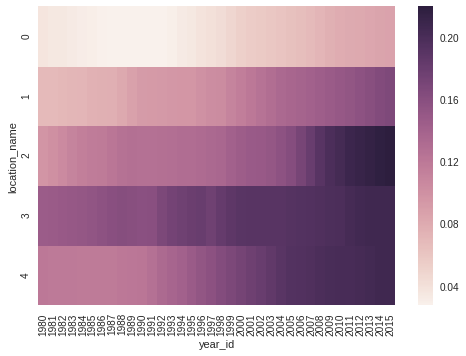

In [0]:
obes_for_HM = part_obes
obes_for_HM['location_name'] = obes_for_HM['location_name'].apply(lab)
gr_obes_for_HM_median = obes_for_HM.groupby('location_name').median()

sns.heatmap(gr_obes_for_HM_median, )

In [0]:
rrr = part_res_pop.iloc[: , 1:] * part_obes.iloc[: , 1:].values
rrr['Country Name'] = part_res_pop['Country Name']
rrr.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country Name
0,6.630545e+07,7.359225e+07,8.133705e+07,8.920547e+07,9.696044e+07,1.046336e+08,1.121139e+08,1.191797e+08,1.258392e+08,1.320905e+08,...,2.457873e+08,2.600862e+08,2.748657e+08,2.902893e+08,3.048288e+08,3.189696e+08,3.317906e+08,3.426357e+08,3.515147e+08,2
1,3.136931e+06,3.113914e+06,3.070650e+06,3.012677e+06,2.947101e+06,2.877852e+06,2.806472e+06,2.785035e+06,2.811169e+06,2.892936e+06,...,1.569617e+07,1.726292e+07,1.887350e+07,2.050313e+07,2.212274e+07,2.364436e+07,2.501287e+07,2.624136e+07,2.728385e+07,2
2,1.331243e+06,1.368310e+06,1.404446e+06,1.491180e+06,1.584439e+06,1.685545e+06,1.791687e+06,1.906449e+06,2.028951e+06,2.159854e+06,...,4.995473e+06,5.193202e+06,5.394543e+06,5.611619e+06,5.847511e+06,6.048312e+06,6.136548e+06,6.242994e+06,6.337914e+06,3
3,9.288395e+06,9.529221e+06,9.750312e+06,9.956593e+06,1.015652e+07,1.034490e+07,1.053411e+07,1.073745e+07,1.095201e+07,1.118205e+07,...,1.865347e+07,1.927675e+07,1.997635e+07,2.048732e+07,2.109756e+07,2.172959e+07,2.238173e+07,2.302261e+07,2.364491e+07,1
4,2.590310e+06,2.575980e+06,2.560129e+06,2.545000e+06,2.533492e+06,2.527087e+06,2.525565e+06,2.530051e+06,2.538738e+06,2.549705e+06,...,5.150869e+06,5.353763e+06,5.582040e+06,5.692577e+06,5.781985e+06,5.843138e+06,5.907081e+06,5.969655e+06,6.029609e+06,2


In [0]:
rrr = rrr.dropna()

In [0]:
res_rel_obes = rrr.groupby('Country Name').sum()
res_rel_obes.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
0,1.715327e+07,1.800217e+07,1.889104e+07,1.989963e+07,2.094863e+07,2.203749e+07,2.318590e+07,2.435177e+07,2.553842e+07,2.673569e+07,...,6.251858e+07,6.472515e+07,6.702414e+07,6.945086e+07,7.198376e+07,7.463461e+07,7.733513e+07,7.984594e+07,8.231548e+07,8.477345e+07
1,2.044746e+08,2.111401e+08,2.175340e+08,2.270731e+08,2.366430e+08,2.460818e+08,2.553109e+08,2.641401e+08,2.724427e+08,2.806451e+08,...,5.897701e+08,6.145492e+08,6.396147e+08,6.638133e+08,6.883200e+08,7.117319e+08,7.328585e+08,7.503206e+08,7.662474e+08,7.805958e+08
2,9.792067e+07,1.061573e+08,1.148118e+08,1.235687e+08,1.321885e+08,1.406896e+08,1.489440e+08,1.568249e+08,1.643912e+08,1.716574e+08,...,3.142142e+08,3.325497e+08,3.502346e+08,3.686442e+08,3.875980e+08,4.056803e+08,4.227826e+08,4.383648e+08,4.516820e+08,4.628345e+08
3,2.509442e+07,2.593510e+07,2.669915e+07,2.759748e+07,2.846877e+07,2.932309e+07,3.016674e+07,3.103707e+07,3.194045e+07,3.290218e+07,...,6.554865e+07,6.752504e+07,6.976131e+07,7.177527e+07,7.376005e+07,7.568944e+07,7.733447e+07,7.864334e+07,7.984440e+07,8.094042e+07
4,7.929847e+07,8.012516e+07,8.075151e+07,8.140096e+07,8.203910e+07,8.270930e+07,8.350925e+07,8.439239e+07,8.544646e+07,8.669077e+07,...,1.449447e+08,1.474911e+08,1.501310e+08,1.519361e+08,1.533943e+08,1.542424e+08,1.556196e+08,1.569926e+08,1.582868e+08,1.596556e+08


In [0]:
r_rel_obes = res_rel_obes.values/res_pop_group.iloc[:,1:]
r_rel_obes.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.124880,0.127454,0.130037,0.133154,0.136236,0.139279,0.142384,0.145296,0.148100,0.150817,...,0.225156,0.226886,0.228680,0.230642,0.232683,0.234829,0.236857,0.238060,0.238933,0.239586
1,0.103034,0.103810,0.104359,0.106304,0.108129,0.109776,0.111225,0.112411,0.113298,0.114081,...,0.171538,0.175859,0.180142,0.184064,0.187955,0.191439,0.194221,0.195969,0.197278,0.198159
2,0.068746,0.073336,0.077948,0.082472,0.086822,0.090922,0.094649,0.097935,0.100901,0.103628,...,0.156524,0.164378,0.171798,0.179463,0.187279,0.194547,0.201215,0.207046,0.211719,0.215333
3,0.082248,0.083800,0.085091,0.086787,0.088371,0.089866,0.091308,0.092793,0.094334,0.096031,...,0.157259,0.160061,0.163370,0.166200,0.169003,0.171671,0.173675,0.174755,0.175630,0.176470
4,0.121022,0.121323,0.121373,0.121514,0.121660,0.121821,0.122102,0.122489,0.123079,0.123824,...,0.181082,0.182762,0.184444,0.185183,0.185554,0.185643,0.185997,0.186374,0.186601,0.186823


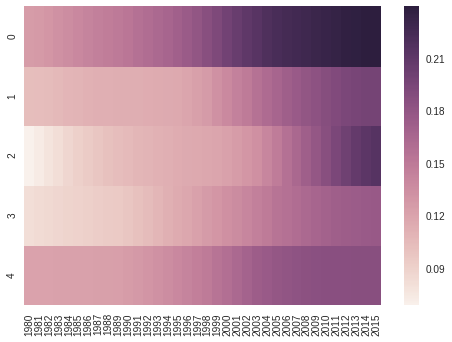

In [0]:
res_part_obes = r_rel_obes
sns.heatmap(r_rel_obes, )

In [0]:
result_obes = []
values = []
labs = []
for i in range(len(ints)):
  values.extend(res_part_obes.iloc[i:i+1].values[0])
  labs.extend([i for j in range(len(res_part_obes.iloc[i:i+1].values[0]))])
print(len(labs), len(values)) 
result_obes.append(values)
result_obes.append(labs)
print(values)
print(labs)

180 180
[0.12488019553319389, 0.12745407538979764, 0.13003709272780473, 0.1331539496589323, 0.13623645627061104, 0.1392792892255395, 0.14238422201781567, 0.14529611117702196, 0.14809951450728387, 0.15081709599566076, 0.15295967081384265, 0.15622217293064825, 0.15976458854938705, 0.16335858269406048, 0.16709971465753645, 0.17106322394240284, 0.17539996742299035, 0.18046116088503636, 0.18641359147944264, 0.1928413622447001, 0.198967331237856, 0.2048992390802427, 0.21000063578885272, 0.21484764736557738, 0.21935946079379195, 0.22249326760761381, 0.22515570214267844, 0.22688635404335708, 0.22868011621089487, 0.23064221017945927, 0.23268335718194055, 0.23482875821875673, 0.23685680316287536, 0.23806004165081818, 0.23893302834601357, 0.23958577292619568, 0.103034452629602, 0.10380975374311331, 0.10435883971292079, 0.10630358523677996, 0.10812871559376593, 0.10977571123230254, 0.11122530444242575, 0.11241062315586225, 0.11329785556740055, 0.11408072435356667, 0.11356599836266154, 0.1141177425

In [0]:

values = []
labs = []
for i in range(len(ints)):
  values.extend(res_lifeExp_pop.iloc[i:i+1].values[0])
  labs.extend([i for j in range(len(res_lifeExp_pop.iloc[i:i+1].values[0]))])
print(len(labs), len(values)) 
result_obes.append(values)
print(values)
print(labs)

180 180
[47.74265122475925, 48.216545946750486, 48.66760172126272, 49.0869787271992, 49.46455836470971, 49.78974342313469, 50.0409254013657, 50.19534995824517, 50.248569199700746, 50.215605317986864, 50.12733172266538, 50.031993862521006, 49.97410191969114, 49.97191882437237, 50.01975167305031, 50.10783678427722, 50.23529905749092, 50.408439123146586, 50.627632257555504, 50.89151562706898, 51.202408783110954, 51.57021977189519, 52.01318649269174, 52.54397257366026, 53.16593284506705, 53.8707198942817, 54.646842619385104, 55.477673411147315, 56.336032464549824, 57.19313309423663, 58.0260260123363, 58.811389569422005, 59.53268373706675, 60.18846696501028, 60.77931757510446, 61.30303230040784, 53.41110148608669, 53.886820629347106, 54.3202766151492, 54.72031275301847, 55.09821241352121, 55.462114058327906, 55.82131995806537, 56.187268616162996, 56.56425803764065, 56.95750297239308, 57.36826762692253, 57.796344422934645, 58.238930148344814, 58.68809059657055, 59.13634150037273, 59.58050267

In [0]:

values = []
labs = []
for i in range(len(ints)):
  values.extend(gdp_res.iloc[i:i+1].values[0])
  labs.extend([i for j in range(len(gdp_res.iloc[i:i+1].values[0]))])
print(len(labs), len(values)) 
result_obes.append(values)


180 180


In [0]:
k = np.array(result_obes)
k.shape

(4, 180)

In [0]:
ress = pd.DataFrame(k.T, columns=['obes', 'labls', 'lifeExp', 'gdp'])
import math
ress['gdp'] = ress['gdp'].apply(math.log)
#ress = ress.set_index('labls')
print(ress.shape)
ress.head()

(180, 4)


,obes,labls,lifeExp,gdp
0,0.124880,0.0,47.742651,5.956119
1,0.127454,0.0,48.216546,5.925346
2,0.130037,0.0,48.667602,5.892352
3,0.133154,0.0,49.086979,5.812291
4,0.136236,0.0,49.464558,5.794711


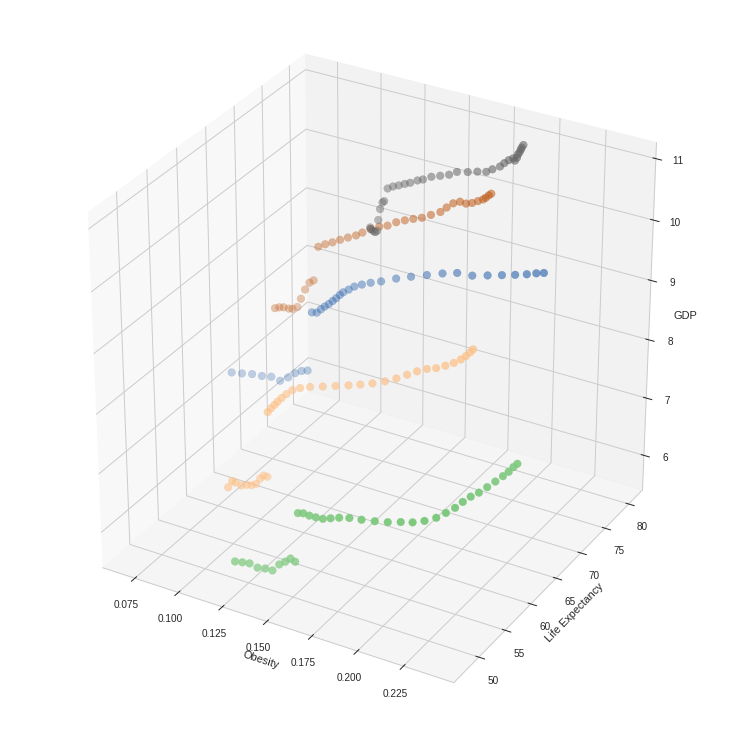

In [142]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig) # Method 1

ax.scatter(ress['obes'], ress['lifeExp'], ress['gdp'], c=ress.labls, s=60, cmap=plt.cm.Accent)
ax.set_xlabel('Obesity')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('GDP')

plt.show()

In [0]:
from bokeh import palettes
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, output_file, show
df = pd.DataFrame({'x':ress['obes'].values, 'y':ress['lifeExp'].values, 'z':ress.labls.values})
x = ress['obes'].values
y = ress['lifeExp'].values
#colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip([55+2*i_x for i_x in x], [34+2*i_y for i_y in y])]
colors = ["#%02x%02x%02x" % (int(r**10), int(r*5/10), 150) for r in ress.labls.values]
# output to static HTML file (with CDN resources)
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

h = figure(tools=TOOLS, x_range=(0, 0.8), y_range=(0, 100))


h.scatter(x, y,color = colors, fill_alpha=0.6, line_color=None)

show(h)

Loading BokehJS ...

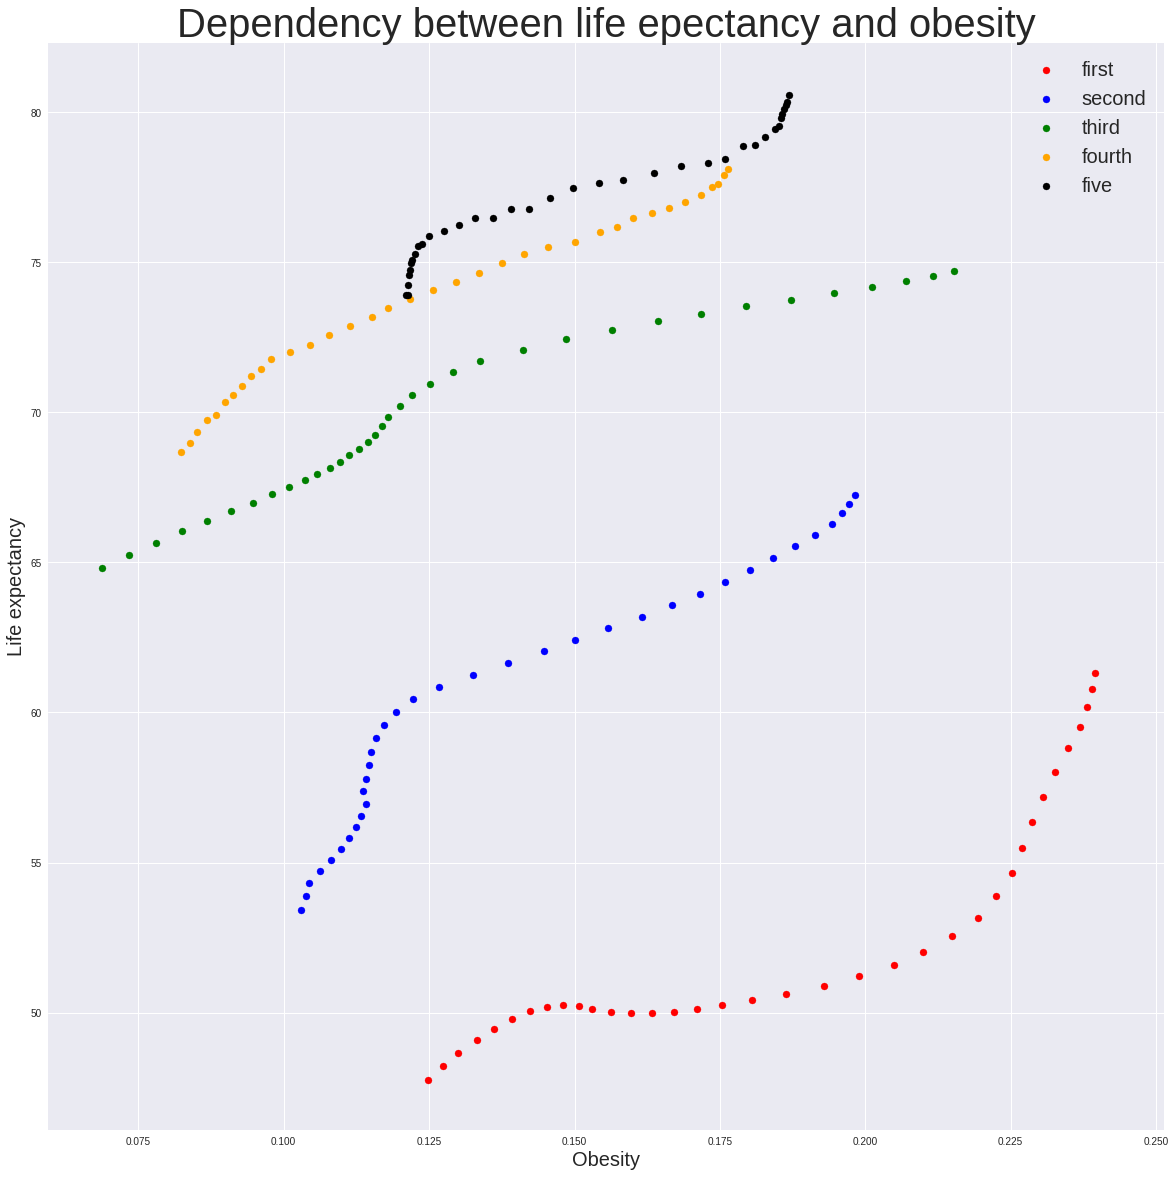

In [118]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(20,20))
cmap_ = cm.BrBG
df = pd.DataFrame({'Obesity':ress['obes'].values, 'Life Expectancy':ress['lifeExp'].values, 'Labels':ress.labls.values})

g_names = ['first', 'second', 'third','fourth', 'five' ]
colors = [ 'red', 'blue', 'green', 'orange', 'black']
for name, group in df.groupby('Labels'): 
  plt.scatter(x = group['Obesity'], y = group['Life Expectancy'], c=colors[int(name)], label=g_names[int(name)])
plt.legend(fontsize=20)
plt.title('Dependency between life epectancy and obesity', {'fontsize': 40})
plt.xlabel('Obesity', {'fontsize': 20})
plt.ylabel('Life expectancy', {'fontsize': 20})
plt.show()

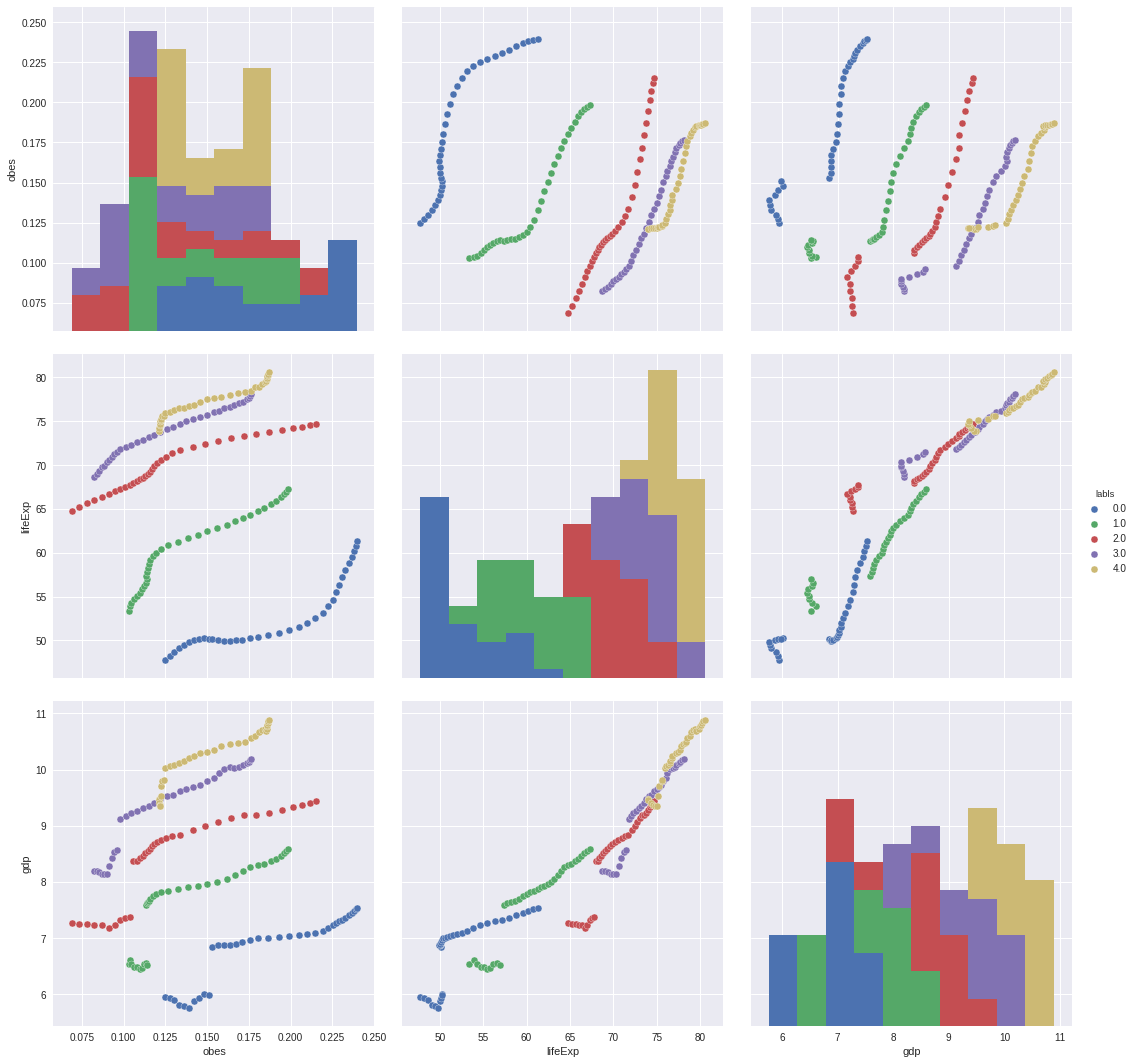

In [139]:
import seaborn as sns
sns.pairplot(ress, vars = ['obes', 'lifeExp', 'gdp'], hue = 'labls', size=5, aspect=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


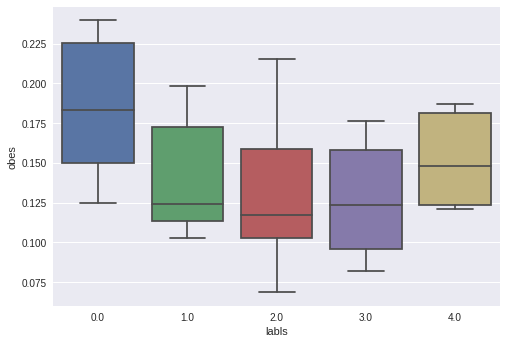

In [182]:
#sns.boxplot(ress, vars = ['obes', 'lifeExp', 'gdp'], hue = 'labls', size=5, aspect=1)
sns.boxplot(x="labls", y="obes", data=ress)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


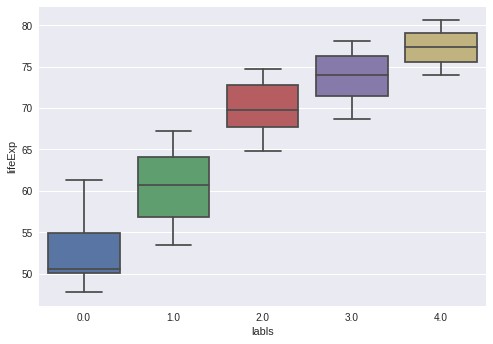

In [183]:
sns.boxplot(x="labls", y="lifeExp", data=ress)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


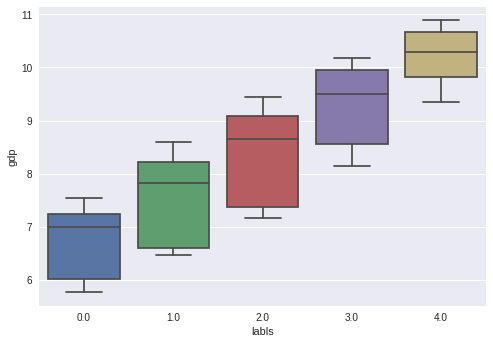

In [184]:
sns.boxplot(x="labls", y="gdp", data=ress)

In [0]:
lifeExp = pd.read_csv('new_Life_Exp.csv', encoding = 'windows-1252', sep=';')
lifeExp['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo', 'Colombia',
       'Comoros', 'Cabo Verde', 'Costa Rica', 'Caribbean small states',
       'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asi

In [0]:
def one_country(x,y):
  #GDP
  gdp_per_capita = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_10515265.csv')
  gdp_per_capita = gdp_per_capita [['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  
  gdp = pd.read_csv('new_gdp.csv')
  gdp = gdp[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989']]
  
  for i in ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']:
    gdp_per_capita[i]=gdp[i]

  ###############
  
  #POPULATION
  res_population = pd.read_csv('res_population.csv')
  res_population = res_population[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  #################
  
  #lIFE eXPECT
  lifeExp = pd.read_csv('new_Life_Exp.csv', encoding = 'windows-1252', sep=';')
  lifeExp = lifeExp[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  ####################
  
  #OBESITY
  obesity = pd.read_csv('IHME_GBD_2015_OBESITY_PREVALENCE_1980_2015_Y2017M06D12.CSV')
  part_obes = obesity[(obesity['sex']=='Both') & (obesity['age_group_name']=='adults (20+) age-standardized`') &  (obesity['metric'] == 'Percent')]
  pa_obes = part_obes[['location_name', 'year_id', 'mean']]
  g = pa_obes.pivot_table(index = 'location_name', columns = 'year_id', values = 'mean')
  part_obes = g.reset_index()
  obesity = part_obes.sort_values('location_name')
  ###################
  #agr
  
  GDP = gdp_per_capita[gdp_per_capita['Country Name']==x].values[0][1:]
  
  
  lExp = lifeExp[lifeExp['Country Name']==x].values[0][1:]
  

  ob = obesity[obesity['location_name']==y].values[0][1:]
  
  
  df = pd.DataFrame(np.array([GDP, lExp, ob]).T, columns = ['gdp', 'lifeExp', 'obes' ])
  #sns.pairplot(df, vars = ['obes', 'lifeExp', 'gdp'])
  
  fig=plt.figure()
  ax1=fig.add_subplot(111)
  scat1 = ax1.scatter(list(lExp), list(ob))

  for i, txt in enumerate(range(1980,2016)):
    ax1.annotate(str(txt)[2:], (lExp[i], ob[i]))
  plt.show()
  
  #sns.plt.show()
  
  
  

Сюда вводи две страны, а чуть ниже только одну, зато там будут все 9 графиков
Пример есть

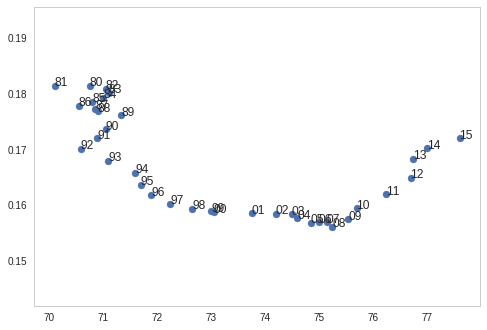

In [0]:
one_country('Poland', 'Poland')

In [0]:
def one_country_(x):
  #GDP
  gdp_per_capita = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_10515265.csv')
  gdp_per_capita = gdp_per_capita [['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  
  gdp = pd.read_csv('new_gdp.csv')
  gdp = gdp[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989']]
  
  for i in ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']:
    gdp_per_capita[i]=gdp[i]

  ###############
  
  #POPULATION
  res_population = pd.read_csv('res_population.csv')
  res_population = res_population[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  #################
  
  #lIFE eXPECT
  lifeExp = pd.read_csv('new_Life_Exp.csv', encoding = 'windows-1252', sep=';')
  lifeExp = lifeExp[['Country Name', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015']]
  ####################
  
  #OBESITY
  obesity = pd.read_csv('IHME_GBD_2015_OBESITY_PREVALENCE_1980_2015_Y2017M06D12.CSV')
  part_obes = obesity[(obesity['sex']=='Both') & (obesity['age_group_name']=='adults (20+) age-standardized`') &  (obesity['metric'] == 'Percent')]
  pa_obes = part_obes[['location_name', 'year_id', 'mean']]
  g = pa_obes.pivot_table(index = 'location_name', columns = 'year_id', values = 'mean')
  part_obes = g.reset_index()
  obesity = part_obes.sort_values('location_name')
  ###################
  
  #agr
  
  GDP = gdp_per_capita[gdp_per_capita['Country Name']==x].values[0][1:]
  GDP = [math.log(i) for i in GDP]
  
  
  lExp = lifeExp[lifeExp['Country Name']==x].values[0][1:]
  

  ob = obesity[obesity['location_name']==x].values[0][1:]
  
  
  df = pd.DataFrame(np.array([GDP, lExp, ob]).T, columns = ['gdp', 'lifeExp', 'obes' ])
  g = sns.pairplot(df, vars = ['obes', 'lifeExp', 'gdp'])
  g.fig.suptitle(x, y=1.05, fontsize=25, weight='bold')
  sns.plt.show()
  
  
  

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


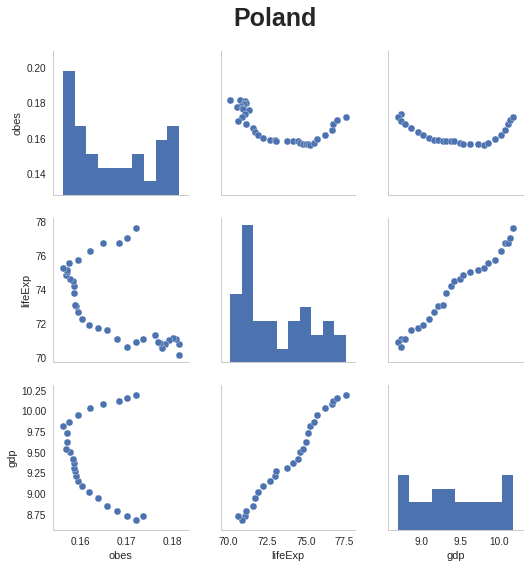

In [0]:
one_country_('Poland')